In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
time = ctrl.Antecedent(np.arange(0, 25, 1), 'time')
conditions = ctrl.Antecedent(np.arange(0, 11, 1), 'conditions')
epoc = ctrl.Antecedent(np.arange(0, 5, 1), 'epoc')

position = ctrl.Consequent(np.arange(0, 101, 1), 'position')

# Auto-membership function population is possible with .automf(3, 5, or 7)
time.automf(3)
conditions.automf(5)
epoc.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
position['closed'] = fuzz.trimf(position.universe, [0, 20, 30])
position['semiclosed'] = fuzz.trimf(position.universe, [20, 40,60])
position['medium'] = fuzz.trimf(position.universe, [30, 50, 70])
position['opened'] = fuzz.trimf(position.universe, [55, 70, 100])

/Users/airan/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/airan/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/airan/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/airan/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


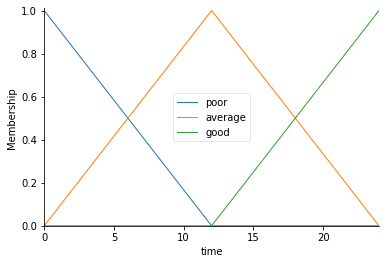

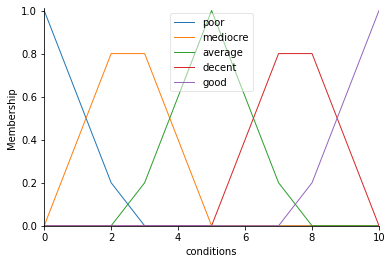

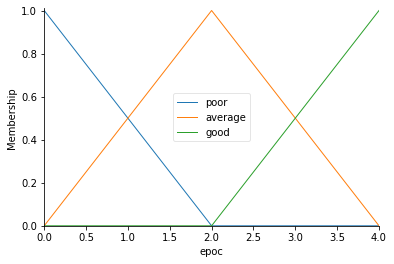

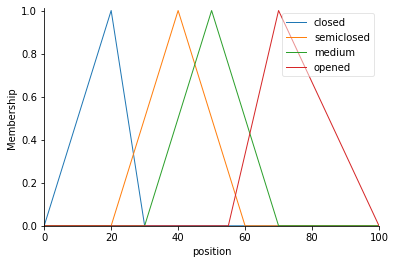

In [7]:
time.view()
conditions.view()
epoc.view()
position.view()

In [8]:
rule1 = ctrl.Rule((time['poor'] | time['good']) & conditions['average'], position['opened'])
rule2 = ctrl.Rule((time['average'] | time['good']) & (epoc['poor'] | epoc['average']), position['opened'])
rule3 = ctrl.Rule(((conditions['poor'] | conditions['mediocre'])) & ((time['average'] & time['good'])), position['closed'])

In [9]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [10]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [17]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)

# Open Roof
tipping.input['time'] = 4
tipping.input['conditions'] = 5
tipping.input['epoc'] = 1

# Crunch the numbers
tipping.compute()

75.41666666666667


/Users/airan/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


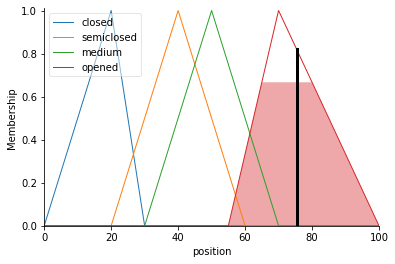

In [18]:
print(tipping.output['position'])
position.view(sim=tipping)

In [19]:
# Close Roof
tipping.input['time'] = 22
tipping.input['conditions'] = 0.5
tipping.input['epoc'] = 4

# Crunch the numbers
tipping.compute()

15.404040404040405


/Users/airan/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


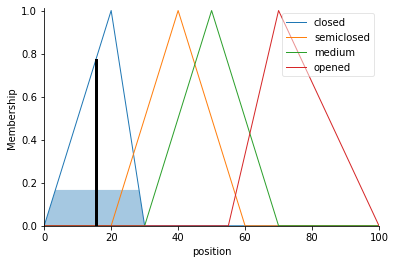

In [20]:
print(tipping.output['position'])
position.view(sim=tipping)